In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
class Logistic_Regression:

  def __init__(self,learning_rate,num_iterations,add_intercept):
    self.learning_rate= learning_rate
    self.num_iterations= num_iterations
    self.add_intercept=add_intercept

  def fit(self,X_train,Y_train,X_dev,Y_dev):
    self.m_train,self.n_train=X_train.shape
    self.m_dev,self.n_dev=X_dev.shape
    self.X_train=X_train
    self.Y_train=Y_train
    self.X_dev=X_dev
    self.Y_dev=Y_dev
    self.w=np.zeros(self.n_train)
    self.b=0

    #implement Gradient Descent
    for i in range(self.num_iterations):
      self.update_weights_train()

    for i in range(self.num_iterations):
      self.update_weights_dev()

  def update_weights_train(self):

    #sigmoid function
    if(self.add_intercept):
      Y_hat=1/(1+np.exp(-(self.X_train.dot(self.w)+ self.b)))
    else:
      Y_hat=1/(1+np.exp(-(self.X_train.dot(self.w))))

    #derivation
    dw=(1/self.m_train)*np.dot(self.X_train.T,(Y_hat-self.Y_train))
    db=(1/self.n_train)*np.sum(Y_hat - self.Y_train)

    #updating the weights and bias
    self.w=self.w-self.learning_rate*dw

    if(self.add_intercept):
      self.b=self.b-self.learning_rate*db


  def update_weights_dev(self):

    #sigmoid function
    if(self.add_intercept):
      Y_hat=1/(1+np.exp(-(self.X_dev.dot(self.w)+ self.b)))
    else:
      Y_hat=1/(1+np.exp(-(self.X_dev.dot(self.w))))

    #derivation
    dw=(1/self.m_dev)*np.dot(self.X_dev.T,(Y_hat-self.Y_dev))
    db=(1/self.n_dev)*np.sum(Y_hat - self.Y_dev)

    #updating the weights and bias
    self.w=self.w-self.learning_rate*dw

    if(self.add_intercept):
      self.b=self.b-self.learning_rate*db


  def predict(self,x):
    Y_pred=1/(1+np.exp(-(x.dot(self.w)+self.b)))
    Y_pred=np.where(Y_pred>0.5,1,0)
    return Y_pred

def Accuracy(y_true,y_pred):
    accuracy=np.sum(y_true==y_pred)/len(y_true)
    return accuracy


In [7]:
#removing null value
data = pd.read_csv('Q1.csv')
data=data.replace(to_replace='#', value=np.nan)
data=data.dropna()
data.head(3)

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign


In [8]:
data=data.drop('S/N',axis=1)
data=data.drop('Year',axis=1)


data.loc[(data['Breast']=="Right"),['Breast']]=1
data.loc[(data['Breast']=="Left"),['Breast']]=0

data.loc[(data['Diagnosis Result']=="Malignant" ),['Diagnosis Result']]=1
data.loc[(data['Diagnosis Result']=="Benign" ),['Diagnosis Result']]=0

data['Breast Quadrant'] = data['Breast Quadrant'].astype('category')
data['Breast Quadrant']=data['Breast Quadrant'].cat.codes

data.head(2)

,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,40,1,2,0,1,0,2,0,0
1,39,1,2,0,0,0,3,0,0


In [9]:
#normalize data
scaler=MinMaxScaler()
normalized_df=scaler.fit_transform(data)
normalized_data= pd.DataFrame(normalized_df,columns=data.columns)
normalized_data.head(10)


,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,0.421875,1.0,0.076923,0.000000,1.0,0.0,0.50,0.0,0.0
1,0.406250,1.0,0.076923,0.000000,0.0,0.0,0.75,0.0,0.0
2,0.500000,0.0,0.230769,0.000000,0.0,0.0,0.25,0.0,0.0
3,0.203125,1.0,0.153846,0.000000,0.0,0.0,0.00,1.0,0.0
4,0.125000,1.0,0.000000,0.000000,1.0,0.0,0.75,1.0,0.0
5,0.578125,0.0,0.307692,0.333333,1.0,1.0,0.25,0.0,1.0
6,0.703125,0.0,0.384615,0.333333,1.0,1.0,0.75,0.0,1.0
7,0.125000,1.0,0.153846,0.000000,0.0,0.0,0.50,0.0,0.0
8,0.343750,1.0,0.230769,0.000000,0.0,0.0,0.75,0.0,0.0
9,0.453125,1.0,0.076923,0.000000,1.0,0.0,0.25,1.0,0.0


In [10]:
#correlation plot
correlation=normalized_data.corr()
correlation.style.background_gradient(cmap='BrBG')

,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
Age,1.000000,-0.707227,0.504572,0.495718,0.041296,0.475651,0.110917,0.180567,0.541728
Menopause,-0.707227,1.000000,-0.378699,-0.353838,-0.069008,-0.392749,-0.017119,-0.099220,-0.375808
Tumor Size (cm),0.504572,-0.378699,1.000000,0.728929,0.137738,0.701399,0.183457,0.200313,0.691806
Inv-Nodes,0.495718,-0.353838,0.728929,1.000000,0.218604,0.881431,0.262271,0.216288,0.780151
Breast,0.041296,-0.069008,0.137738,0.218604,1.000000,0.212610,0.039523,0.020328,0.109973
Metastasis,0.475651,-0.392749,0.701399,0.881431,0.212610,1.000000,0.265121,0.164842,0.748280
Breast Quadrant,0.110917,-0.017119,0.183457,0.262271,0.039523,0.265121,1.000000,-0.016534,0.316730
History,0.180567,-0.099220,0.200313,0.216288,0.020328,0.164842,-0.016534,1.000000,0.210764
Diagnosis Result,0.541728,-0.375808,0.691806,0.780151,0.109973,0.748280,0.316730,0.210764,1.000000


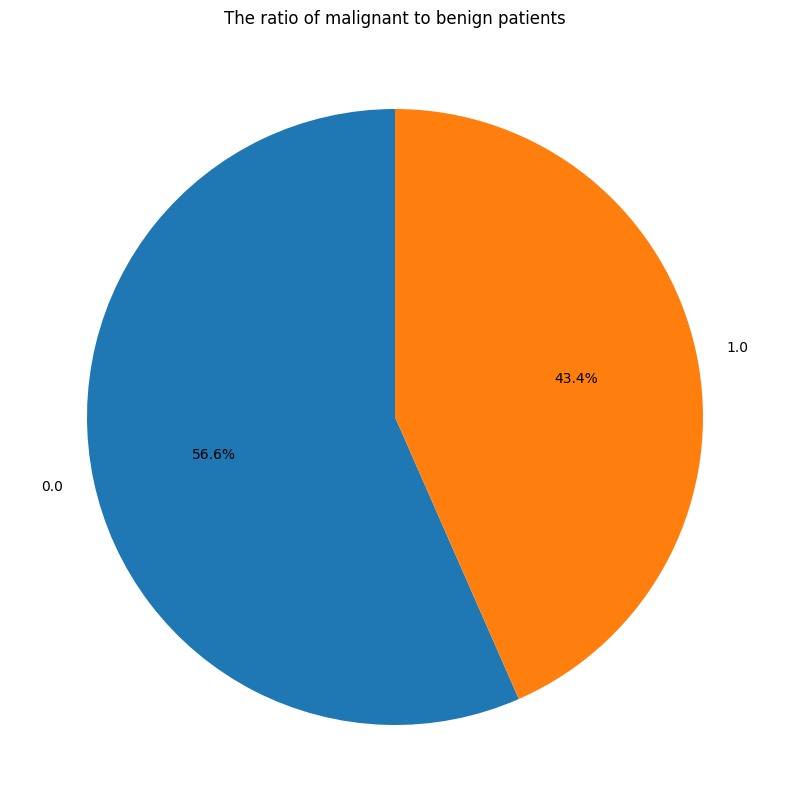

In [11]:
#pie plot
data_pie=normalized_data['Diagnosis Result'].value_counts().rename_axis('Diagnosis').reset_index(name='patient_count')
plt.figure(figsize=(10,10))
plt.pie(data_pie.patient_count,labels=data_pie.Diagnosis,startangle=90,autopct='%.1f%%')
plt.title('The ratio of malignant to benign patients')
plt.show()
# 1.0 : Malignant   , 0.0 : Benign

(array([ 1.,  3.,  0.,  2.,  2.,  0.,  4.,  6.,  0.,  3.,  3.,  0.,  5.,
         0.,  3.,  4.,  0.,  3.,  1.,  0.,  5.,  2.,  0.,  2.,  0.,  1.,
         4.,  0.,  4.,  2.,  0.,  7.,  3.,  0.,  6.,  3.,  0.,  5.,  0.,
        10.,  7.,  0.,  6.,  6.,  0.,  9.,  3.,  0.,  3.,  0.,  7.,  4.,
         0.,  5.,  3.,  0.,  7.,  8.,  0.,  2.,  1.,  0.,  2.,  0.,  3.,
         3.,  0.,  1.,  7.,  0.,  4.,  2.,  0.,  2.,  0.,  4.,  2.,  0.,
         1.,  1.,  0.,  1.,  0.,  0.,  2.,  2.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.

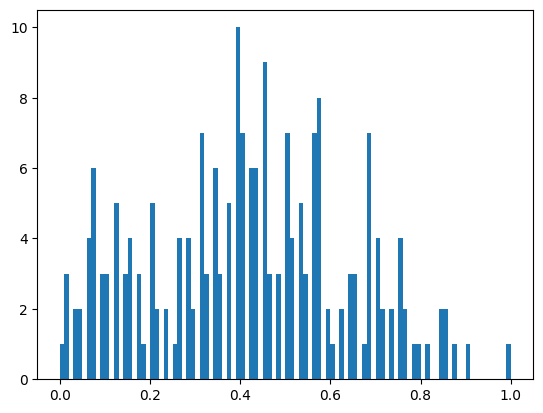

In [12]:
plt.hist(normalized_data['Age'],bins=100)

In [ ]:
sns.pairplot(normalized_data[list(normalized_data.columns)])

In [14]:
features=normalized_data.drop('Diagnosis Result',axis=1)
target=normalized_data['Diagnosis Result']
#split data to 3 parts(train(70%)-test(15%)-dev(15%))
X_train1,X_test,Y_train1,Y_test= train_test_split(features,target,test_size=0.15,random_state=2)
X_train,X_dev,Y_train,Y_dev= train_test_split(features,target,test_size=0.15,random_state=2)
print(features.shape,X_train.shape,X_test.shape,X_dev.shape)

(205, 8) (174, 8) (31, 8) (31, 8)


In [15]:
classifier= Logistic_Regression(0.001,1000,True)
classifier.fit(X_train,Y_train,X_dev,Y_dev)

In [16]:
x_train_prediction=classifier.predict(X_train)
training_data_accuracy=Accuracy(Y_train,x_train_prediction)
training_data_accuracy

0.8448275862068966

In [17]:
x_test_prediction=classifier.predict(X_test)
test_data_accuracy=Accuracy(Y_test,x_test_prediction)
test_data_accuracy

0.8387096774193549

In [20]:
#for draw plot
ler_rate=[0.001,0.01,1,10,30,50,80];
acc=[]

In [ ]:
#test the model for different learning rate and save resault in acc
for lr in ler_rate:
  classifier= Logistic_Regression(lr,1000,True)
  classifier.fit(X_train,Y_train,X_dev,Y_dev)

  x_test_prediction=classifier.predict(X_test)
  test_data_accuracy=Accuracy(Y_test,x_test_prediction)
  acc.append(test_data_accuracy)

In [ ]:
#plot for showing models'resault for different learning rate
plt.scatter(ler_rate,acc,color="r")
plt.plot(ler_rate,acc)
plt.xlabel("learning_rate,number of iteration=1000")
plt.ylabel("Accuracy")


In [ ]:
preds=classifier.predict(X_test)
print('f1_score :',f1_score(Y_test,preds))
print('precision_score :',precision_score(Y_test,preds))
print('recall_score :',recall_score(Y_test,preds))

f1_score : 0.888888888888889
precision_score : 0.9230769230769231
recall_score : 0.8571428571428571


 درصد پیش‌بینی‌های صحیح مدل را اندازه‌گیری می‌کند.precision
 درصد نقاط داده مربوطه را که به درستی توسط مدل شناسایی شده اند، اندازه گیری می کندrecall
 میانگین ریکال و پریسیژن می باشدf1